# Stochastic simulations of a novel pathogen

In [5]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
def SSA_SIR(_alpha,_beta):
    # Input parameters ####################
    # int; total population
    N = 350
    # float; maximum elapsed time
    T = 100.0
    # float; start time
    t = 0.0

    # float; spatial parameter
    V = 100.0

    # float; rate of infection after contact
    _alpha = 10.0

    # float; rate of cure
    _beta = 0.5

    # int; initial infected population
    n_I = 1

    #########################################

    # Compute susceptible population, set recovered to zero
    n_S = N - n_I
    n_R = 0

    # Initialize results list
    SIR_data = []
    SIR_data.append((t, n_S, n_I, n_R))

    # Main loop
    while t < T:
        if n_I == 0:
            break

        w1 = _alpha * n_S * n_I / V
        w2 = _beta * n_I
        W = w1 + w2

        dt = -math.log(random.uniform(0.0, 1.0)) / W
        t = t + dt

        if random.uniform(0.0, 1.0) < w1 / W:
            n_S = n_S - 1
            n_I = n_I + 1
        else:
            n_I = n_I - 1
            n_R = n_R + 1

        SIR_data.append((t, n_S, n_I, n_R))
    return(SIR_data)

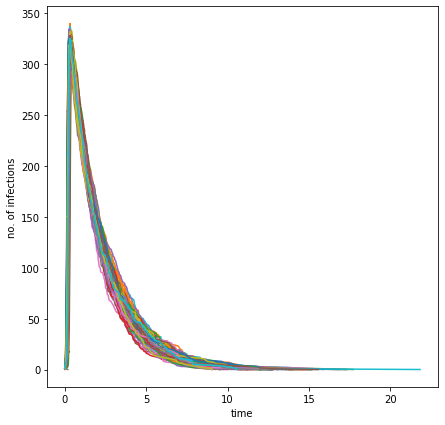

In [6]:
plt.figure(figsize=(7,7))
for j in range(100):
    data=SSA_SIR(0.39,0.4)
    data=np.array(data)
    plt.plot(data[:,0],data[:,2])
plt.xlabel("time")
plt.ylabel("no. of infections")
plt.show()